## Question 2

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

def continuous_compounding(principal, rate, time):
    return principal * math.exp(rate * time)

In [2]:
principal_payment = 50000
coupon_payment = 300
maturity = 2
period_length = 0.25
coupon_moments = [period_length * (x + 1) for x in range(int(maturity/period_length))]
risk_free_rate = 0.015

fair_value = 0

# Add fair values of coupons
for moment in coupon_moments:
    coupon_value = continuous_compounding(coupon_payment, -risk_free_rate, moment)
    fair_value += coupon_value
    print(f"Coupon at time {moment} has present value: €{coupon_value:.2f}")

print(f"\nFair value of all coupons: €{fair_value:.2f}\n")

principal_value = continuous_compounding(principal_payment, -risk_free_rate, maturity)

print(f"Fair value of principal payment: €{principal_value:.2f}\n")

fair_value += principal_value

print(f"Total Fair value of coupon bond: €{fair_value:.2f}")




Coupon at time 0.25 has present value: €298.88
Coupon at time 0.5 has present value: €297.76
Coupon at time 0.75 has present value: €296.64
Coupon at time 1.0 has present value: €295.53
Coupon at time 1.25 has present value: €294.43
Coupon at time 1.5 has present value: €293.33
Coupon at time 1.75 has present value: €292.23
Coupon at time 2.0 has present value: €291.13

Fair value of all coupons: €2359.93

Fair value of principal payment: €48522.28

Total Fair value of coupon bond: €50882.20


## Question 3
$F_0 > S_0e^{rT}$ arbitrage opportunity:
- Give out forward and borrow $S_0$ to buy the asset.
- At t = T, sell the asset at $F_0$ and use $S_0e^{rT}$ to pay off loan.
- Arbitrage profit is equal to $F_0 - S_0e^{rT}$ (if asset is not bought at t = T, leaves with no profit or loss)

$F_0 < S_0e^{rT}$ arbitrage opportunity with asset:
- Take forward and sell asset at $S_0$, invest at risk-free rate $r$.
- At t = T, buy asset at $F_0$.
- Arbitrage profit is equal to $S_0e^{rT} - F_0$

In [3]:
S0 = 100
r = 0.05
T = 1

continuous_compounding(S0, r, T)

105.12710963760242

## Question 4

First we describe what the portfolios are worth at maturity. 

#### Portfolio 1:
- The call option with strike price K. At maturity, this is worth $\text{max}\{S_T - K, 0\}$, because buying the asset at $K$ if it's worth more results in a $S_T - K$ profit and if it's worth less you don't buy it.
- The $Ke^{-rT}$ money investment. At maturity, this will be $Ke^{-rT}e^{rT} = K$.

#### Portfolio 2:
- The put option with strike price K. Similar to portfolio 1, this option will be worth $\text{max}\{K - S_T, 0\}$ at maturity, but now because we sell the share only if it's worth less than $K$, resulting in a profit of $K - S_T$.
- The share will be worth $S_T$ at maturity.

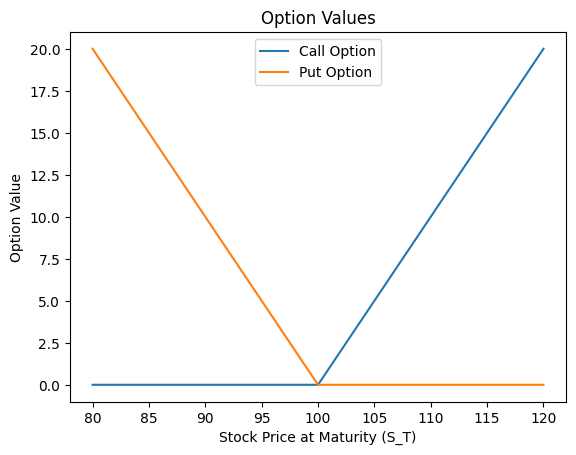

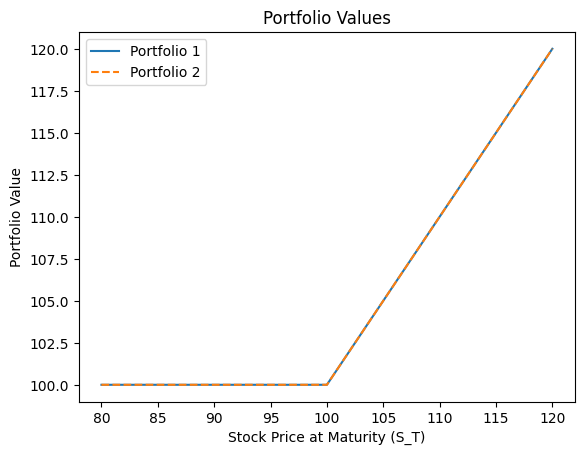

In [17]:
K = 100

call_values = []
put_values = []
money_values = []
share_values = []

for ST in np.arange(80, 121, 1):
    call_values.append(max(ST - K, 0))
    put_values.append(max(K - ST, 0))
    money_values.append(K)
    share_values.append(ST)

portfolio_1 = [call_values[i] + money_values[i] for i in range(len(call_values))]
portfolio_2 = [put_values[i] + share_values[i] for i in range(len(put_values))]

# First plot only the option values
plt.plot(share_values, call_values, label="Call Option")
plt.plot(share_values, put_values, label="Put Option")
plt.legend()
plt.xlabel("Stock Price at Maturity (S_T)")
plt.ylabel("Option Value")
plt.title("Option Values")
plt.show()

# Then plot the portfolio values (portfolio 2 dotted)
plt.plot(share_values, portfolio_1, label="Portfolio 1")
plt.plot(share_values, portfolio_2, label="Portfolio 2", linestyle="--")
plt.legend()
plt.xlabel("Stock Price at Maturity (S_T)")
plt.ylabel("Portfolio Value")
plt.title("Portfolio Values")
plt.show()
 

## Question 5

Create 2 portfolios (at any time $t \in [0, T]$):
1) Buy a call option and sell a put option. This is worth $C_t - P_t$ now.
2) Buy one share and borrow $e^{-r(T-t)}K$. This is worth $S_t - e^{-r(T-t)}K$ now.

At maturity, these two portfolios will be worth:
1) $S_T - K$, because if $S_T < K$ only the put option will be exercised and if $S_T > K$ only the call option will be exercised. Either way this results in payoff $S_T - K$.
2) $S_T - K$, because the share is now worth $S_T$ and the loan has grown to $e^{-r(T-t)}Ke^{r(T-t)} = K$

Since these two portfolios have the same payoff, they should also have the same price. Otherwise, arbitrage exists and could be used by buying the cheaper portfolio and selling / shorting the more expensive one (so selling where the portfolio buys and loaning where it borrows and vice versa). This would give an instant payoff and at maturity, the portfolios cancel out, leaving the arbitrageur with a profit.

This means that:
\begin{equation*}
    C_t - P_t = S_t - e^{-r(T-t)}K
\end{equation*}
Which can be rewritten to:
\begin{equation*}
    C_t + e^{-r(T-t)}K = P_t + S_t
\end{equation*}